In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Since we are going to perform mathematical operations, we need to convert the pandas dataframe to a numpy array

In [4]:
import numpy as np
data = np.array(df)
m,n = data.shape
print(f"m: {m}")
print(f"n: {n}")

m: 42000
n: 785


So we have 42000 training examples and 784 features each excluding the label column

In [5]:
data[:5]

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

First columns is the label and rest are pixel values or the features

In [6]:
data[:5].T

array([[1, 0, 1, 4, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

As we can see after transpose, we get the first row as the label. This makes easy in retrieving the target variable for splitting.

In [7]:
np.random.shuffle(data)
val_data = data[0 : 2000].T
Y_val = val_data[0]
X_val = val_data[1 : n]
X_val = X_val / 255.

In [8]:
train_data = data[2000 : m].T
Y_train = train_data[0]
X_train = train_data[1 : n]
X_train = X_train / 255.

In [27]:
def initialize_parameters():
    """
    This function initializes random values for initial weights and biases of our neural network
    There will be a input layer, two hidden layer with 300 and 100 neurons and output layer with 10 neurons representing mnist digits
    """

    W1 = np.random.rand(300, 784) - 0.5
    #returns an array of random values between (0, 1) with the shape (300, 784)
    b1 = np.random.rand(300, 1) - 0.5
    #returns an array of random values between (0, 1) with the shape (300, 1)
    W2 = np.random.rand(100, 300) - 0.5
    #returns an array of random values between (0, 1) with the shape (100, 300)
    b2 = np.random.rand(100, 1) - 0.5
    #returns an array of random values between (0, 1) with the shape (100, 1)
    W3 = np.random.rand(10, 100) - 0.5
    #returns an array of random values between (0, 1) with the shape (10, 100)
    b3 = np.random.rand(10, 1) - 0.5
    #returns an array of random values between (0, 1) with the shape (10, 1)

    return W1, b1, W2, b2, W3, b3

In [11]:
def ReLU(Z):
    """
    For each element in Z, the ReLU function returns Z if Z is positive and return 0 if Z is negative
    """
    return np.maximum(Z ,0)

In [12]:
def Softmax(Z):
    """
    The Softmax function converts the final score into probability distribution over different classes
    np.exp(Z) calculates the element-wise exponential of input Z
    np.sum(np.exp(Z)) calculates the sum of the exponentiated values of ell elements of Z
    """
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [13]:
def one_hot_encoding(Y):
    """
    We have our final output as probability distribution over 10 classes
    To calculate the loss, we need to convert the label Y to same format
    So for that , we perform one hot encoding which does something like if label = 3 the, encoded format = (0,0,0,1,0,0,0,0,0,0)
    """
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    #This creates a matrix of required size with zeroes
    one_hot_Y[np.arange(Y.size), Y] = 1
    #This sets the elements in one_hot_Y to 1 based on the class labels Y
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [14]:
def forward_propagation(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = Softmax(Z3)

    return Z1, A1, Z2, A2, Z3, A3

In [15]:
def derivative_ReLU(Z):
    """
    This derivative is used to compute the gradients of the loss with respect to the input of the ReLU activation function to optimize our parameters
    """
    #If any element in Z is greater than 0 , return 1 otherwise 0
    return Z > 0

In [16]:
def back_propagation(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot_encoding(Y)
    
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3, axis=1, keepdims=True) 
    
    dZ2 = W3.T.dot(dZ3) * derivative_ReLU(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = W2.T.dot(dZ2) * derivative_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3

In [17]:
def update_parameters(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    """
    Use the cost function to update weights and biases
    """
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3

    return W1, b1, W2, b2, W3, b3

In [18]:
def predictions(A3):
    """
    returns the index of the maximum value which will be the predicted label
    """
    return np.argmax(A3, 0)

In [19]:
def accuracy(predictions, Y):
    """
    Calculates the accuracy of the model by comparing the predicted labels with the true labels
    """
    return np.sum(predictions == Y) / Y.size

In [20]:
def run(X, Y, alpha, epochs):
    W1, b1, W2, b2, W3, b3 = initialize_parameters()
    for i in range(epochs):
        Z1, A1, Z2, A2, Z3, A3 = forward_propagation(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = back_propagation(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_parameters(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        #Print the accuracy at every 10th epoch
        if i % 10 == 0:
            print("Epoch:", i)
            prediction = predictions(A3)
            print(f"Accuracy: {accuracy(prediction, Y)}")
            print("~~~~~~~~~~~~~~~~~")

    return W1, b1, W2, b2, W3, b3

In [21]:
W1, b1, W2, b2, W3, b3 = run(X_train, Y_train, 0.10, 500)

Epoch: 0
Accuracy: 0.114975
~~~~~~~~~~~~~~~~~
Epoch: 10
Accuracy: 0.475425
~~~~~~~~~~~~~~~~~
Epoch: 20
Accuracy: 0.5989
~~~~~~~~~~~~~~~~~
Epoch: 30
Accuracy: 0.672975
~~~~~~~~~~~~~~~~~
Epoch: 40
Accuracy: 0.714425
~~~~~~~~~~~~~~~~~
Epoch: 50
Accuracy: 0.741575
~~~~~~~~~~~~~~~~~
Epoch: 60
Accuracy: 0.7617
~~~~~~~~~~~~~~~~~
Epoch: 70
Accuracy: 0.7783
~~~~~~~~~~~~~~~~~
Epoch: 80
Accuracy: 0.7918
~~~~~~~~~~~~~~~~~
Epoch: 90
Accuracy: 0.8023
~~~~~~~~~~~~~~~~~
Epoch: 100
Accuracy: 0.81225
~~~~~~~~~~~~~~~~~
Epoch: 110
Accuracy: 0.819325
~~~~~~~~~~~~~~~~~
Epoch: 120
Accuracy: 0.826925
~~~~~~~~~~~~~~~~~
Epoch: 130
Accuracy: 0.833975
~~~~~~~~~~~~~~~~~
Epoch: 140
Accuracy: 0.84035
~~~~~~~~~~~~~~~~~
Epoch: 150
Accuracy: 0.845725
~~~~~~~~~~~~~~~~~
Epoch: 160
Accuracy: 0.849825
~~~~~~~~~~~~~~~~~
Epoch: 170
Accuracy: 0.854275
~~~~~~~~~~~~~~~~~
Epoch: 180
Accuracy: 0.857825
~~~~~~~~~~~~~~~~~
Epoch: 190
Accuracy: 0.861675
~~~~~~~~~~~~~~~~~
Epoch: 200
Accuracy: 0.865
~~~~~~~~~~~~~~~~~
Epoch: 210
Accurac

In [22]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    Z1, A1, Z2, A2, Z3, A3 = forward_propagation(W1, b1, W2, b2, W3, b3, X)
    prediction = predictions(A3)
    return prediction

In [23]:
val_prediction = make_predictions(X_val, W1, b1, W2, b2, W3, b3)
accuracy(val_prediction, Y_val) * 100

89.60000000000001

We got a  89 percent accuracy on the validation set too after 500 epochs

In [24]:
import matplotlib.pyplot as plt

In [25]:
def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


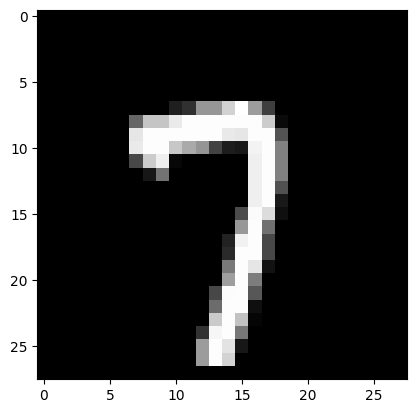

In [26]:
test_prediction(56, W1, b1, W2, b2, W3, b3)